# Linear Regression from scratch

In statistics, linear regression is a linear approach for modeling the relationship between a scalar dependent variable y and one or more explanatory variables (or independent variables) denoted X.

In this notebook, we demonstrate the case of one explanatory variable called simple linear regression since it easy to visualize. The technique demonstrated can easily be extended to apply for more than one explanatory variable (multiple linear regression)

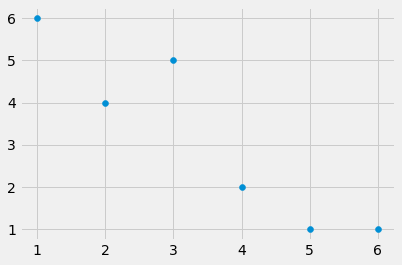

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from statistics import mean
import random
style.use('fivethirtyeight')

#plotting some random points 
x = np.array([1,2,3,4,5,6],dtype=np.float64)  #single independent variable
y = np.array([6,4,5,2,1,1],dtype=np.float64)  #dependent variable

plt.scatter(x,y)
plt.show()

# Finding the best fit line

In [12]:
def best_fit_slope_intercept(x,y):
    m = (mean(x)*mean(y)-mean(x*y))/(mean(x)**2 - mean(x*x))
    b = mean(y) - m*mean(x)
    return m,b

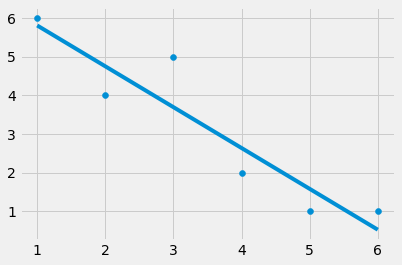

In [13]:
#find the best fit line for the given point set
m,b = best_fit_slope_intercept(x,y) 

#finding the regression line
reg_line = [(m*i)+b for i in x]

#plotting the given points
plt.scatter(x,y)

#plotting the regression line
plt.plot(x,reg_line)
plt.show()

# Measurement of Goodness of Fit

In [14]:
def squared_error(y_orig,y_line):
    return sum((y_orig-y_line)**2)

def coeff_det(y_orig,y_line):
    y_mean_line = [mean(y_orig) for i in y_orig]
    sse = squared_error(y_orig,y_line)
    sst = squared_error(y_orig,y_mean_line)
    return 1-(sse/sst)

print(coeff_det(y,reg_line))

0.856517205422


# Creating our dataset 

In [3]:
# hm :  size of dataset (number of points)
# var:  variance in the y-value 
# step: change in y-value for consecutive x-values
# correlation: whether y-value increases with x-value or not.

def create_dataset(hm,var,step=2,correlation=False):
    val =1
    ys = []
    for i in range(hm):
        y = val + random.randrange(-var,var)
        ys.append(y)
        if correlation and correlation == 'pos':
            val+=step
        elif correlation and correlation == 'neg':
            val-=step
    xs = [i for i in range(len(ys))]        
    return np.array(xs,dtype=np.float64), np.array(ys,dtype=np.float64)

In [4]:
#Creating dataset
xs,ys = create_dataset(100,20,2,'pos')
print(xs)

#Fitting the best fit line
m,b = best_fit_slope_intercept(xs,ys)
reg_line = [(m*i)+b for i in xs]

#Plotting the points and the regression line
plt.scatter(xs,ys)
plt.plot(xs,reg_line)
plt.show()

#Finding the coefficient of determination
print(coeff_det(ys,reg_line))

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71.
 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88. 89.
 90. 91. 92. 93. 94. 95. 96. 97. 98. 99.]


NameError: name 'best_fit_slope_intercept' is not defined

This regression line can now be used to make predictions for new unseen x-values.